## Dataset loading and visualization

(100,) (100,)


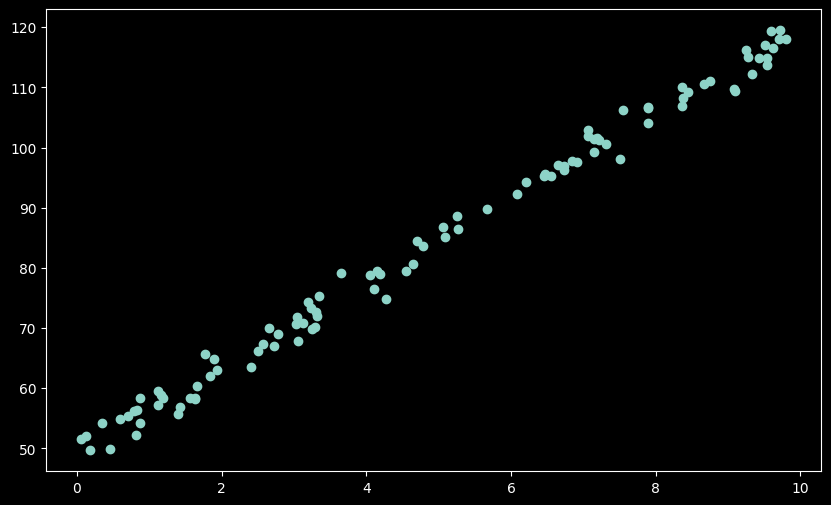

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
max_x = 10

plt.figure(figsize=(10, 6))
dataset = np.load('linear_regression_dataset.npz')
x, y = dataset['x'], dataset['y']
dataset_size = x.shape[0]
print(x.shape, y.shape)

def plot(x, y, slope=None, offset_y=None):
    plt.plot(x, y, 'o') # scatter plot of dataset
    if slope is not None:
        plt.plot([0, max_x], [offset_y, offset_y + max_x * slope]) # straight line defined by slope and offset_y
    plt.show()

plot(x, y)

## Linear regression based on hand derived derivative
Implement the `compute_derivatives` function.

plot before training


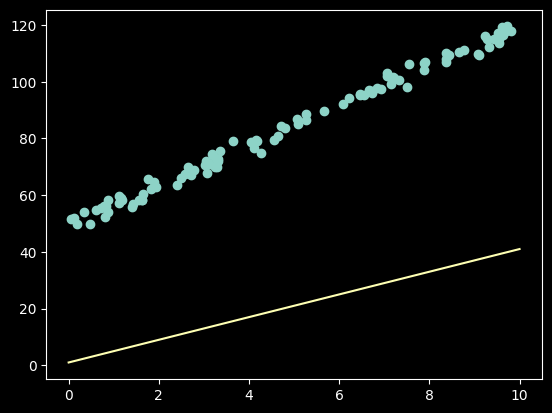

iter: 100, slope: 8.886193268314393, offset_y: 1.99172134482976, error: 1515.1736724622083
iter: 200, slope: 11.352336813944152, offset_y: 2.6220444024980747, error: 845.2569487304539
iter: 500, slope: 13.48934693995678, offset_y: 3.7217831955276583, error: 597.9943086220453


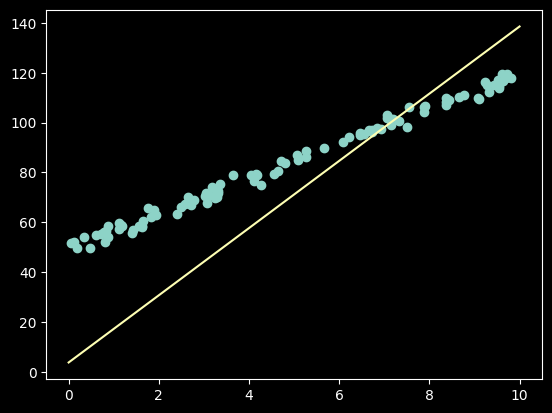

iter: 1000, slope: 13.633138752360182, offset_y: 5.01782598029832, error: 562.2044505224028
iter: 5000, slope: 12.332030441602543, offset_y: 13.845592699105225, error: 362.33732574000607
iter: 10000, slope: 11.051472150857288, offset_y: 22.455508528391075, error: 209.83453592597274
iter: 20000, slope: 9.344282864234662, offset_y: 33.93390523138297, error: 71.74936727334212


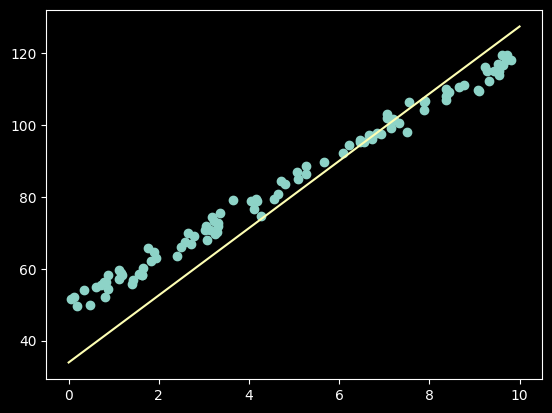

iter: 30000, slope: 8.362780084552877, offset_y: 40.53310214443563, error: 26.10714841793612
iter: 40000, slope: 7.798491335747095, offset_y: 44.32713375216766, error: 11.020719061535988
iter: 50000, slope: 7.4740686253681385, offset_y: 46.50841066057447, error: 6.034100171540373


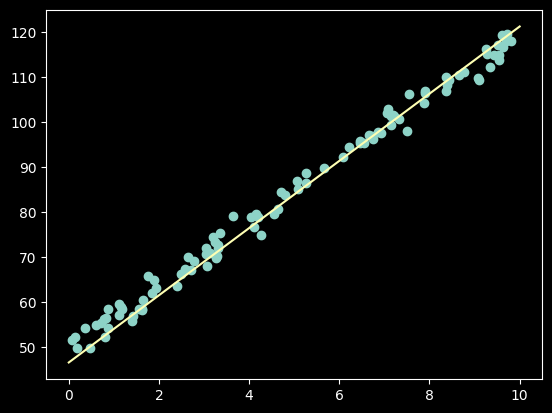

iter: 60000, slope: 7.287550472680562, offset_y: 47.7624774272964, error: 4.38583951511714
iter: 70000, slope: 7.180316853796936, offset_y: 48.4834695440398, error: 3.841028842506483
iter: 80000, slope: 7.118665755213824, offset_y: 48.8979846609383, error: 3.660948909254486
iter: 90000, slope: 7.083221106454616, offset_y: 49.136299031022766, error: 3.6014258786121602
iter: 100000, slope: 7.062843154487317, offset_y: 49.2733114985377, error: 3.5817513312439413
plot after training


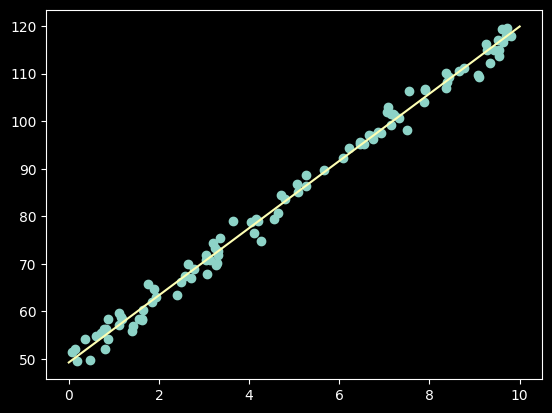

In [2]:
def compute_derivatives(x, y, slope, offset_y):
    slope_derivative = 0
    offset_y_derivative = 0
    for i in range(dataset_size):
        slope_derivative += 2 * (offset_y + slope * x[i] - y[i]) * x[i]
        offset_y_derivative += 2 * (offset_y + slope * x[i] - y[i])
    slope_derivative /= dataset_size
    offset_y_derivative /= dataset_size
    return slope_derivative, offset_y_derivative

def compute_error(x, y, slope, offset_y):
    error = 0
    for i in range(dataset_size):
        error += (offset_y + slope * x[i] - y[i]) ** 2
    error /= dataset_size
    return error

slope = 4 # our inital guess for the slope parameter
offset_y = 1 # our inital guess for the offset parameter
print('plot before training')
plot(x, y, slope, offset_y)
num_steps = 100000
learning_rate = 0.0001
for iteration in range(1, num_steps + 1):
    slope_derivative, offset_y_derivative = compute_derivatives(x, y, slope, offset_y)
    slope = slope - learning_rate * slope_derivative
    offset_y = offset_y - learning_rate * offset_y_derivative
    if iteration in [100, 200, 500, 1000, 5000] or iteration % 10000 == 0:
        print('iter: {}, slope: {}, offset_y: {}, error: {}'.format(iteration, slope, offset_y,
              compute_error(x, y, slope, offset_y)))
    if iteration in [500, 20000, 50000]:
        plot(x, y, slope, offset_y)
print('plot after training')
plot(x, y, slope, offset_y)

## Linear regression based on EDF

Implement the `forward` and `backward` method of the class `L2Loss`.

In [3]:
import edf

# y shape: (batch size, 1)
# y_hat shape: (batch size, 1)
# output shape: (batch size, 1)
class L2Loss(edf.CompNode):
    def __init__(self, y, y_hat):
        edf.CompNodes.append(self)
        self.y = y
        self.y_hat = y_hat

    def forward(self):
        self.value = np.square(self.y_hat.value - self.y.value)

    def backward(self):
        self.y.addgrad(self.grad * 2 * (self.y.value - self.y_hat.value))
        self.y_hat.addgrad(self.grad * 2 * (self.y_hat.value - self.y.value))

### Definition of EDF's computation graph
Use EDF to assemble a computational graph for linear regression with the "mean" images as input. You will need the `L2Loss` node that you implemented above. The function `train` below expects variables `affine_params`, `x_node`, `y_node` and `loss_node` to be defined.

In [4]:
edf.clear_compgraph()
x_node = edf.Input()
y_node = edf.Input()
affine_params = edf.AffineParams(1, 1) # Affine layer with one input and one output
y_hat_node = edf.Affine(affine_params, x_node)
loss_node = L2Loss(y_node, y_hat_node)

iter: 100, slope: 8.886195182800293, offset_y: 1.9917207956314087, error: 1527.4199899634439
iter: 200, slope: 11.352337837219238, offset_y: 2.6220433712005615, error: 848.4740625312529
iter: 500, slope: 13.489343643188477, offset_y: 3.7217822074890137, error: 598.1142599696273
iter: 1000, slope: 13.633136749267578, offset_y: 5.017825126647949, error: 562.2663714903945
iter: 5000, slope: 12.332035064697266, offset_y: 13.845572471618652, error: 362.37745454557154
iter: 10000, slope: 11.051482200622559, offset_y: 22.455495834350586, error: 209.85759274475637
iter: 20000, slope: 9.344310760498047, offset_y: 33.9338264465332, error: 71.75761892306292
iter: 30000, slope: 8.362838745117188, offset_y: 40.532936096191406, error: 26.110515919852865
iter: 40000, slope: 7.798544883728027, offset_y: 44.32687759399414, error: 11.022289046954663
iter: 50000, slope: 7.474152088165283, offset_y: 46.507957458496094, error: 6.035134379485554
iter: 60000, slope: 7.287631511688232, offset_y: 47.7620353698

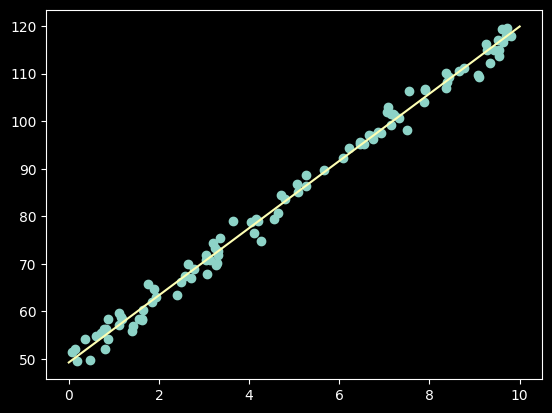

In [5]:
def train(num_steps, x, y, affine_params, x_node, y_node, loss_node):
    affine_params.A.value[0, 0] = 4 # manually overwrite EDF's random initalization to get consistent results
    affine_params.b.value[0] = 1
    x_node.value = x.reshape(-1, 1)
    y_node.value = y.reshape(-1, 1)
    for iteration in range(1, num_steps + 1):
        edf.Forward()
        edf.Backward(loss_node)
        edf.UpdateParameters()
        error = np.sum(loss_node.value) / dataset_size
        slope = affine_params.A.value[0, 0]
        offset_y = affine_params.b.value[0]
        if iteration in [100, 200, 500, 1000, 5000] or iteration % 10000 == 0:
            print('iter: {}, slope: {}, offset_y: {}, error: {}'.format(iteration, slope, offset_y, error))

edf.learning_rate = learning_rate
train(num_steps, x, y, affine_params, x_node, y_node, loss_node)
plot(x, y, slope, offset_y)